# CT5170: Principles of ML - Assignment 2
## Course code: 1MAO3
### Participants (name: id): (Daniel Verdejo: 22240224, Thomas Cronin: 22239435)


In [228]:
import pandas as pd
import numpy as np
from seaborn import lmplot, stripplot
import matplotlib.pyplot as plt

import doctest


# Helper Functions

In [229]:
# TODO: Potentially remove this if we don't actually need it
# Entropy calculation - need to figure out whats really required to check what causes a fire or not
# Presuming the date isn't really all that important, I believe the attributes of interest are:
# temp, humidity, rainfall, drought_code, buildup_index, wind_speed
# For each outcome, (yes / no in this case) sum all of the positive and negative cases to the first algorithm above 
# page 139 - ref: https://drive.google.com/drive/folders/1U6F01iWnnSTrJQzviE02ST8WMc8UdOML

def entropy(y):
    """ Entropy - for a set of data summate all positive cases, and negative cases:
        for each case calculate p * log2 p (log base 2) if p is a non negative number

        Should return 1.0 if there label distribution is equal
        >>> round(entropy(np.array([1,1,1,1,0,0,0,0])),3)
        1.0

        Should return 0.0 if the labels are one sided negatively
        >>> Y = np.array([0,0,0,0,0,0,0,0,0])
        >>> round(entropy(Y),3)
        -0.0
        
        Should return 0.0 if the labels are one sided positively
        >>> Y = np.array([1,1,1,1,1])
        >>> round(entropy(Y),3)
        -0.0

        Should return a value close to 1.0 if the labels are almost equal
        >>> Y = np.array([1, 0, 0, 0, 1, 1, 0 ,1 ,0, 0, 1, 0, 1])
        >>> round(entropy(Y), 3)
        0.996

        Should return a float closer to 0.0 if the labels are very unbalanced
        >>> Y = np.array([1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1])
        >>> round(entropy(Y),3)
        0.286
    """
    P = np.bincount(y) / len(y) # number of unique outputs / all possible outputs
    return - np.sum([p * np.log2(p) for p in P if p > 0])


In [230]:
doctest.run_docstring_examples(entropy, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    round(entropy(np.array([1,1,1,1,0,0,0,0])),3)
Expecting:
    1.0
ok
Trying:
    Y = np.array([0,0,0,0,0,0,0,0,0])
Expecting nothing
ok
Trying:
    round(entropy(Y),3)
Expecting:
    -0.0
ok
Trying:
    Y = np.array([1,1,1,1,1])
Expecting nothing
ok
Trying:
    round(entropy(Y),3)
Expecting:
    -0.0
ok
Trying:
    Y = np.array([1, 0, 0, 0, 1, 1, 0 ,1 ,0, 0, 1, 0, 1])
Expecting nothing
ok
Trying:
    round(entropy(Y), 3)
Expecting:
    0.996
ok
Trying:
    Y = np.array([1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1])
Expecting nothing
ok
Trying:
    round(entropy(Y),3)
Expecting:
    0.286
ok


In [231]:
# Tom Cronin
def read_data_return_dataframe(PathToFile):
    """
    Reads data from a specified text file. Requires the path to the text file

    Should return a dataframe of the test file
    >>> type(read_data_return_dataframe('testdata.txt'))
    <class 'pandas.core.frame.DataFrame'>

     Should have correct data in the dataframe.
     There should be 20 entrys in the dataframe excluding of the column names
    >>> read_data_return_dataframe('testdata.txt').size
    20
    """
    return pd.read_table(PathToFile) # reads txt file and converts it to a pandas dataframe

In [232]:
doctest.run_docstring_examples(read_data_return_dataframe, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    type(read_data_return_dataframe('testdata.txt'))
Expecting:
    <class 'pandas.core.frame.DataFrame'>
ok
Trying:
    read_data_return_dataframe('testdata.txt').size
Expecting:
    20
ok


In [233]:
# Daniel Verdejo - split into labels and attributes
def split_df_labels_attributes(df):
    """ Split the dataframe into two by labels and attributes

        Keyword arguments:
        df -- A pandas dataframe type containing labels and attributes
        label_col_name -- A string which contains the name of the label column. 

        Returns:
        tuple -- (label: pd.DataFrame, attributes: pd.DataFrame)

        Should output only the Label column
        >>> labels, attrs = split_df_labels_attributes(read_data_return_dataframe('testdata.txt'))
        >>> labels
                  Label
                0  no   
                1  no

        Should not contain the Label column
        >>> labels, attrs = split_df_labels_attributes(read_data_return_dataframe('testdata-alt.txt'))
        >>> 'label' in attrs
        False
        
        >>> attrs.columns
        Index(['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index',
          'day', 'month', 'wind_speed'],
        dtype='object')
      """
    return (df.iloc[:,0:1], df.iloc[:,1:])  # (for every row take columns upto index 1 exclusive, for every row take every column from 1 onwards inclusive)

In [234]:
doctest.run_docstring_examples(split_df_labels_attributes, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    labels, attrs = split_df_labels_attributes(read_data_return_dataframe('testdata.txt'))
Expecting nothing
ok
Trying:
    labels
Expecting:
              Label
            0  no   
            1  no
ok
Trying:
    labels, attrs = split_df_labels_attributes(read_data_return_dataframe('testdata-alt.txt'))
Expecting nothing
ok
Trying:
    'label' in attrs
Expecting:
    False
ok
Trying:
    attrs.columns
Expecting:
    Index(['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index',
      'day', 'month', 'wind_speed'],
    dtype='object')
ok


In [235]:
# Daniel Verdejo - train, test splilt dataframe
def split_df_to_train_test_dfs(df, return_validation=False):
    """ Splits a single dataframe into 2 dataframes
    
    Arguments:
    df -- A pandas Dataframe to be split into 2

    Returns:
    tuple -- (df_train: pandas.Dataframe, df_test: pandas.Dataframe)
    
    Should split a single dataframe into 2 unique dataframes
    >>> df = read_data_return_dataframe('wildfires.txt')
    >>> train, test = split_df_to_train_test_dfs(df)
    >>> train.index.equals(tr.index)
    False

    Length of train and test dataframes should equal the length of the orignal
    >>> df = read_data_return_dataframe('wildfires.txt')
    >>> train, test = split_df_to_train_test_dfs(df)
    >>> len(train) + len(test) == len(df)
    True

    Should contain different values
    >>> df = read_data_return_dataframe('wildfires.txt')
    >>> train, test = split_df_to_train_test_dfs(df)
    >>> train.values != test.values
    True
    """
    train_frac = round(np.random.uniform(.6, .7), 2) # get a random float for our training fraction
    df_train = df.sample(frac = train_frac) # randomly sample a fraction of the dataframe between 60 & 70 % of its entirety
    return (df_train,  df.drop(df_train.index)) # return the training data and the test data

In [236]:
doctest.run_docstring_examples(split_df_to_train_test_dfs, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    df = read_data_return_dataframe('wildfires.txt')
Expecting nothing
ok
Trying:
    train, test = split_df_to_train_test_dfs(df)
Expecting nothing
ok
Trying:
    train.index.equals(tr.index)
Expecting:
    False
**********************************************************************
File "__main__", line 14, in NoName
Failed example:
    train.index.equals(tr.index)
Exception raised:
    Traceback (most recent call last):
      File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/doctest.py", line 1334, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest NoName[2]>", line 1, in <module>
        train.index.equals(tr.index)
    NameError: name 'tr' is not defined
Trying:
    df = read_data_return_dataframe('wildfires.txt')
Expecting nothing
ok
Trying:
    train, test = split_df_to_train_test_dfs(df)
Expecting nothing
ok
Trying:
    len(train) + len(test) == len(df)
Expecting:
    True
ok
Trying:
   

<doctest NoName[8]>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  train.values != test.values


In [237]:
def normalise_outputs(Y):
    """ Change the outputs from 'yes' and 'no' to 1s and 0s 1 = yes, 0 = no

    Args:
    Y -- dataframe containing the labels to convert to numerical

    Returns:
    integer array

    >>> normalise_outputs(read_data_return_dataframe("./testdata-alt.txt"))
    [0,0,1,0,1,1]
    """
    return [1 if 'yes' in y else 0 for y in Y['fire']]

In [238]:
doctest.run_docstring_examples(normalise_outputs, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    normalise_outputs(read_data_return_dataframe("./testdata-alt.txt"))
Expecting:
    [0,0,1,0,1,1]
**********************************************************************
File "__main__", line 10, in NoName
Failed example:
    normalise_outputs(read_data_return_dataframe("./testdata-alt.txt"))
Exception raised:
    Traceback (most recent call last):
      File "/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
        return self._engine.get_loc(casted_key)
      File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
      File "pandas/_libs/index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
      File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
      File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
    Key

# Data Exploration

In [239]:
# Tom Cronin
wildfires_df = read_data_return_dataframe("wildfires.txt") # Loads The wildfire Dataset

In [240]:
# Tom Cronin
wildfires_df.shape # gets the dimensions of the dataframe

(204, 10)

In [241]:
# Tom Cronin
wildfires_df.columns # gets the features of the columns

Index(['fire', 'year', 'temp', 'humidity', 'rainfall', 'drought_code',
       'buildup_index', 'day', 'month', 'wind_speed'],
      dtype='object')

In [242]:
# Tom Cronin
wildfires_df.dtypes # returns the datatypes

fire              object
year               int64
temp               int64
humidity           int64
rainfall         float64
drought_code     float64
buildup_index    float64
day                int64
month              int64
wind_speed         int64
dtype: object

In [243]:
# Tom Cronin
wildfires_df.describe(include='all')

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
count,204,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.975490,31.906863,62.279412,0.823529,48.537647,16.542304,15.691176,7.553922,16.446078
std,NaN,3.320987,3.814175,15.209388,2.117959,49.133366,14.634994,8.907722,1.196067,3.098074
min,NaN,2007.000000,22.000000,21.000000,0.000000,7.180000,1.320000,1.000000,6.000000,6.000000
25%,NaN,2009.000000,29.000000,52.750000,0.000000,10.627500,6.067500,8.000000,6.000000,14.750000
50%,NaN,2012.000000,32.000000,63.000000,0.000000,30.550000,11.535000,15.500000,8.000000,16.000000
75%,NaN,2015.000000,35.000000,74.250000,0.600000,62.367500,22.665000,24.000000,9.000000,18.000000


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'rainfall'}>,
        <AxesSubplot:title={'center':'drought_code'}>,
        <AxesSubplot:title={'center':'buildup_index'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'wind_speed'}>]], dtype=object)

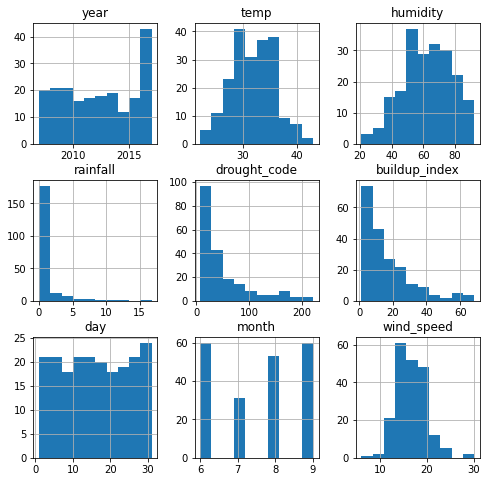

In [244]:
# Tom Cronin
# Lets Look at the data graphically
wildfires_df.hist(figsize = (8,8))

In [245]:
# Tom Cronin
features = ['year', 'temp', 'humidity', 'rainfall', 'drought_code','buildup_index', 'day', 'month', 'wind_speed'] # list of features wanted
wildfires_df_normalised_copy = wildfires_df.copy()
wildfires_df_standardise_copy = wildfires_df.copy()

wildfires_features = wildfires_df[features].values # returns a numpy NdArray of the features
wildfires_labels = wildfires_df[['fire']].values # returns a numpy NdArray of the label

wildfires_features_normalise_copy = wildfires_df_normalised_copy[features].values # returns a numpy NdArray of the features
wildfires_features_standardise_copy = wildfires_df_standardise_copy[features].values # returns a numpy NdArray of the features

wildfires_features_normalise_copy # Shows the features



array([[2.015e+03, 2.800e+01, 5.900e+01, ..., 1.000e+00, 6.000e+00,
        1.900e+01],
       [2.010e+03, 3.000e+01, 6.100e+01, ..., 2.000e+00, 6.000e+00,
        1.300e+01],
       [2.009e+03, 2.600e+01, 8.300e+01, ..., 3.000e+00, 6.000e+00,
        2.200e+01],
       ...,
       [2.009e+03, 2.700e+01, 8.800e+01, ..., 2.800e+01, 9.000e+00,
        3.000e+01],
       [2.016e+03, 2.500e+01, 5.600e+01, ..., 2.900e+01, 9.000e+00,
        2.000e+01],
       [2.012e+03, 2.400e+01, 6.200e+01, ..., 3.000e+01, 9.000e+00,
        1.700e+01]])

In [246]:
# Tom Cronin ToDo coment and add tests
def standardise(ndarray, features):
    """
    Standardises the data by subtracting the mean from each element and dividing it by the standard deviation
    The results of standarising the data will reduce the standard deviation to 1 and the mean of each feature to 0
    :param ndarray: A multidimentional array containing the features needed to be normalised
    :param features: A list of features in the ndarray e.g. Wind, Year
    :return: returns a new ndarry containg standardised data

    ToDo: Add tests
    """
    for feature in range(len(features)):
        array = ndarray[:, feature] # gets column of feature
        std = np.std(array)         # gets the std deviation of the feature
        mean = np.mean(array)       # gets the mean of the feature
        ndarray[:, feature] = (array-mean)/std  # calculates and replaces the column with its standardised version
    return ndarray

def normalise(ndarray, features):
    """
    Standardises the data by subtracting the mean from each element and dividing it by the standard deviation
    The results of standarising the data will reduce the standard deviation to 1 and the mean of each feature to 0
    :param ndarray: A multidimentional array containing the features needed to be normalised
    :param features: A list of features in the ndarray e.g. Wind, Year
    :return: returns a new ndarry containg standardised data

    ToDo: Add tests
    """
    for feature in range(len(features)):
        array = ndarray[:, feature] # gets column of feature
        xmin = min(array)      # gets the min value
        xmax = max(array)      # gets the max value
        ndarray[:, feature] = (array-xmin)/(xmax-xmin)  # calculates and replaces the column with its normalised version
    return ndarray

wildfires_features_standardised = standardise(wildfires_features_standardise_copy, features)
# print(wildfires_features_normalise_copy[:,0])

wildfires_features_normalised = normalise(wildfires_features_normalise_copy, features)


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'rainfall'}>,
        <AxesSubplot:title={'center':'drought_code'}>,
        <AxesSubplot:title={'center':'buildup_index'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'wind_speed'}>]], dtype=object)

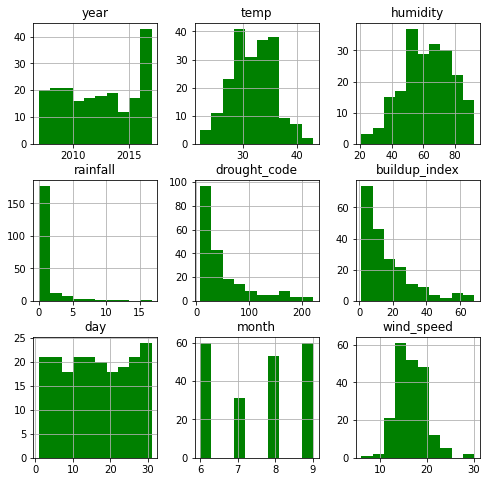

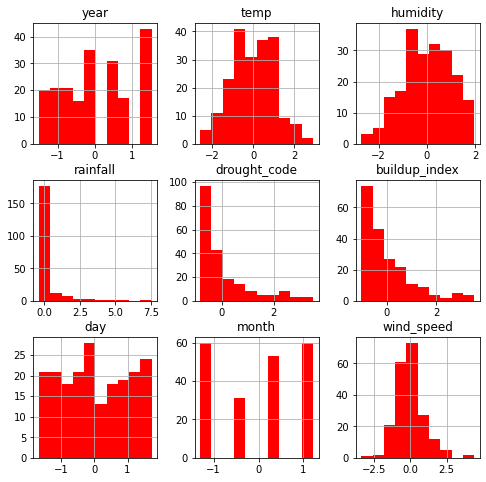

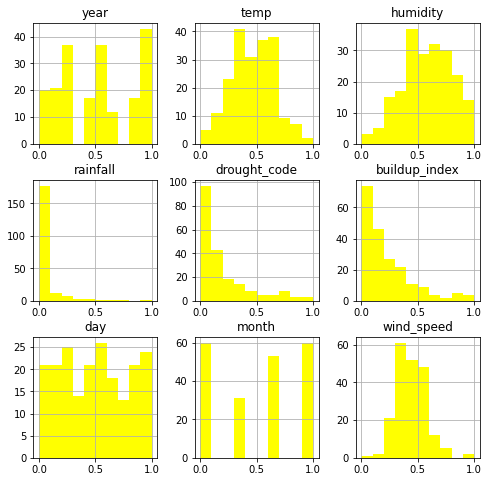

In [247]:
wildfires_df.hist(figsize = (8,8), color = 'green')
wildfires_features_standardised_df = pd.DataFrame(wildfires_features_standardised, columns=features)
wildfires_features_standardised_df.hist(figsize = (8,8), color = 'red')
wildfires_features_normalised_df = pd.DataFrame(wildfires_features_normalised, columns=features)
wildfires_features_normalised_df.hist(figsize = (8,8), color = 'yellow')

# I THINK WE SHOULD USE NORMALISED

In [248]:
# Daniel Verdejo - initial perceptron based on description above
# TODO : create a fn to normalise the outputs! THEN change this test to use the real y!!! ¯\_(ツ)_/¯
# TODO : Figure out if fit_predict and eval are needed ¯\_(ツ)_/¯
class Perceptron:
    """ The perceptron class 

    should return am imstamce of the created object
    >>> Perceptron(learn_rate=0.1, n_iters=100)
    Perceptron()

    should return self (an instance of the object)
    >>> df = read_data_return_dataframe("./testdata-alt.txt")
    >>> y, X = split_df_labels_attributes(df)
    >>> Perceptron(learn_rate=0.1, n_iters=100).fit(X, np.array([0,0,1,0,1,1]))
    Perceptron()

    should return the prediction
    >>> df = read_data_return_dataframe("./testdata-alt.txt")
    >>> y, X = split_df_labels_attributes(df)
    >>> _, X_test = split_df_labels_attributes(read_data_return_dataframe('./testdata.txt'))
    >>> P = Perceptron(learn_rate=0.5, n_iters=1000).fit(X, np.array([0,0,1,0,1,1]))
    >>> P.predict(X_test)
    array([0, 0])
    """

    def __init__(self, learn_rate, n_iters):
        self.learn_rate = learn_rate
        self.n_iters = n_iters
        self.activation_fn = (lambda x: np.where(x >= 0, 1, 0))

    def __repr__(self):
        return f"{type(self).__name__}()"

    def fit(self, X, y=None):

        if(isinstance(X, pd.DataFrame)):
            X = X.to_numpy()
        
        self.weights = np.random.rand(X.shape[1])
        self.bias = np.random.rand(10)[0]

        for _ in range(self.n_iters):
            for i, x_i in enumerate(X):
                ln_out = np.dot(x_i, self.weights) + self.bias
                update = self.learn_rate * (y[i] - self.activation_fn(ln_out))

                self.weights = self.weights + (update * x_i)
                self.bias += update
                
        return self

    def predict(self, X):
        if(isinstance(X, pd.DataFrame)):
            X = X.to_numpy()
        ln_out = np.dot(X, self.weights) + self.bias
        pred = self.activation_fn(ln_out)
        return pred

    # Not sure if these are needed yet
    def fit_predict(self):
        return self

    def evaluate(self):
        pass

# TODO: remove these when done testing! 
df = read_data_return_dataframe("./wildfires.txt")
df_train, df_test = split_df_to_train_test_dfs(df)
y_train, X_train = split_df_labels_attributes(df_train)

y_train = normalise_outputs(y_train)
print(y_train)
y_test, X_test = split_df_labels_attributes(df_test)
y_test = normalise_outputs(y_test)

P = Perceptron(.5, 1000).fit(X_train, y_train)
print(y_test)
pred = P.predict(X_test)
pred


[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0]


array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0])

In [249]:
doctest.run_docstring_examples(Perceptron, globals(), verbose=True, optionflags=doctest.NORMALIZE_WHITESPACE)

Finding tests in NoName
Trying:
    Perceptron(learn_rate=0.1, n_iters=100)
Expecting:
    Perceptron()
ok
Trying:
    df = read_data_return_dataframe("./testdata-alt.txt")
Expecting nothing
ok
Trying:
    y, X = split_df_labels_attributes(df)
Expecting nothing
ok
Trying:
    Perceptron(learn_rate=0.1, n_iters=100).fit(X, np.array([0,0,1,0,1,1]))
Expecting:
    Perceptron()
ok
Trying:
    df = read_data_return_dataframe("./testdata-alt.txt")
Expecting nothing
ok
Trying:
    y, X = split_df_labels_attributes(df)
Expecting nothing
ok
Trying:
    _, X_test = split_df_labels_attributes(read_data_return_dataframe('./testdata.txt'))
Expecting nothing
ok
Trying:
    P = Perceptron(learn_rate=0.5, n_iters=1000).fit(X, np.array([0,0,1,0,1,1]))
Expecting nothing
ok
Trying:
    P.predict(X_test)
Expecting:
    array([0, 0])
**********************************************************************
File "__main__", line ?, in NoName
Failed example:
    P.predict(X_test)
Expected:
    array([0, 0])
Got

In [250]:
# Multi-layer perceptron
class MLP:

    def __init__(self, layers):
        self.layers
        pass

    def fit(self, X, y, epochs):
        pass

    def evaluate(self, X, y):
        pass

    def predict(self):
        pass

    def fit_predict(self):
        pass
